# 판다스 10분 완성


판다스 초보자들을 위한 판다스 기초 내용을 다룬다.
여기서 다루는 배용은 [판다스 요리책](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)을 
많이 참고한다.

**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 객체 생성

참고: [판다스 자료구조](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro)

**시리즈 객체 생성**

리스트를 이용하여 시리즈를 생성할 수 있다.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

**데이터프레임 객체 생성**

방식 1: 2차원 어레이, 인덱스 라벨, 열 라벨을 지정하여 데이터프레임을 생성할 수 있다.

- 인덱스 라벨: 날짜시간(`datetime`) 인덱스 이용

In [3]:
dates = pd.date_range(start="20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 열 라벨은 A, B, C, D로 지정

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.117814,-0.355988,1.479719,-0.727166
2013-01-02,1.022635,1.475657,0.301533,-1.329995
2013-01-03,-0.345439,-0.775075,1.177510,0.373745
2013-01-04,0.117598,-0.101356,-1.882859,-1.126330
2013-01-05,-0.687611,0.438592,-0.138059,0.854213
2013-01-06,-0.131819,1.201128,0.990373,-0.150159


방식 2: 사전 객체를 이용할 수도 있다.
- 사전의 키; 열 라벨
- 인덱스 라벨: 정수 인덱스 자동 지정

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


열별로 다른 자료형이 사용될 수 있다.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 데이터 살펴보기

참고: [데이터프레임 핵심 기초](https://pandas.pydata.org/docs/user_guide/basics.html#basics)

- 처음 5행 확인

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.117814,-0.355988,1.479719,-0.727166
2013-01-02,1.022635,1.475657,0.301533,-1.329995
2013-01-03,-0.345439,-0.775075,1.177510,0.373745
2013-01-04,0.117598,-0.101356,-1.882859,-1.126330
2013-01-05,-0.687611,0.438592,-0.138059,0.854213


- 끝에서 3행 확인

In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,0.117598,-0.101356,-1.882859,-1.126330
2013-01-05,-0.687611,0.438592,-0.138059,0.854213
2013-01-06,-0.131819,1.201128,0.990373,-0.150159


- 인덱스 라벨 확인

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 열 라벨 확인

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- 넘파이 어레이로 변환: 인덱스 라벨과 열 라벨 정보 삭제

In [11]:
df.to_numpy()

array([[ 0.1178136 , -0.35598822,  1.47971936, -0.72716577],
       [ 1.02263549,  1.47565735,  0.30153287, -1.32999455],
       [-0.34543921, -0.7750752 ,  1.17750972,  0.37374489],
       [ 0.11759796, -0.10135587, -1.88285863, -1.12632961],
       [-0.68761088,  0.43859162, -0.13805927,  0.85421294],
       [-0.1318188 ,  1.20112814,  0.9903727 , -0.15015887]])

- 열별 자료형이 통일되지 않은 경우: `object`로 통일된 자료형 사용. 시간 소요.

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

- 수치형 데이터의 분포 확인

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.015530,0.313826,0.321369,-0.350948
std,0.579924,0.889883,1.232267,0.862461
min,-0.687611,-0.775075,-1.882859,-1.329995
25%,-0.292034,-0.292330,-0.028161,-1.026539
50%,-0.007110,0.168618,0.645953,-0.438662
75%,0.117760,1.010494,1.130725,0.242769
max,1.022635,1.475657,1.479719,0.854213


- 전치 데이터프레임

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.117814,1.022635,-0.345439,0.117598,-0.687611,-0.131819
B,-0.355988,1.475657,-0.775075,-0.101356,0.438592,1.201128
C,1.479719,0.301533,1.177510,-1.882859,-0.138059,0.990373
D,-0.727166,-1.329995,0.373745,-1.126330,0.854213,-0.150159


- 열 라벨 내림차순 정렬

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.727166,1.479719,-0.355988,0.117814
2013-01-02,-1.329995,0.301533,1.475657,1.022635
2013-01-03,0.373745,1.177510,-0.775075,-0.345439
2013-01-04,-1.126330,-1.882859,-0.101356,0.117598
2013-01-05,0.854213,-0.138059,0.438592,-0.687611
2013-01-06,-0.150159,0.990373,1.201128,-0.131819


- 특정 열의 값을 기준으로 행 정렬

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-0.345439,-0.775075,1.177510,0.373745
2013-01-01,0.117814,-0.355988,1.479719,-0.727166
2013-01-04,0.117598,-0.101356,-1.882859,-1.126330
2013-01-05,-0.687611,0.438592,-0.138059,0.854213
2013-01-06,-0.131819,1.201128,0.990373,-0.150159
2013-01-02,1.022635,1.475657,0.301533,-1.329995


## 인덱싱/슬라이싱

In [17]:
type(pd.core.indexing._LocIndexer)

type

In [18]:
type(abs)

builtin_function_or_method

In [19]:
np.r_

In [20]:
type(np.c_)

numpy.lib.index_tricks.CClass

권장 사항: 넘파이 어레이의 인덱싱, 슬라이싱 방식보다 아래 방식 권장됨. 보다 효율적이고 빠름.

- [`DataFrame.at[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at)
- [`DataFrame.iat[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat)
- [`DataFrame.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc)
- [`DataFrame.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc)

참고

- [Indexing and Selecting Data](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing)
- [MultiIndex / Advanced Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced)

### 열 선택

열 라벨을 이용한 인덱싱. 시리즈 생성.

In [21]:
df["A"]

2013-01-01    0.117814
2013-01-02    1.022635
2013-01-03   -0.345439
2013-01-04    0.117598
2013-01-05   -0.687611
2013-01-06   -0.131819
Freq: D, Name: A, dtype: float64

객체의 속성처럼 이용하는 방식도 가능.

In [22]:
df.A

2013-01-01    0.117814
2013-01-02    1.022635
2013-01-03   -0.345439
2013-01-04    0.117598
2013-01-05   -0.687611
2013-01-06   -0.131819
Freq: D, Name: A, dtype: float64

### 행 슬라이싱

정수 인덱스 활용. 데이터프레임 생성

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,0.117814,-0.355988,1.479719,-0.727166
2013-01-02,1.022635,1.475657,0.301533,-1.329995
2013-01-03,-0.345439,-0.775075,1.177510,0.373745


인덱스 라벨 활용. 정수 인덱스 방식과 조금 다름.

In [24]:
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,0.117814,-0.355988,1.479719,-0.727166
2013-01-02,1.022635,1.475657,0.301533,-1.329995
2013-01-03,-0.345439,-0.775075,1.177510,0.373745


### `loc[]`: 라벨 활용 인덱싱/슬라이싱

인덱스 라벨을 이용하면 열 라벨을 인덱스로 사용하는 시리즈가 생성된다.

In [25]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [26]:
df.loc[dates[0]]

A    0.117814
B   -0.355988
C    1.479719
D   -0.727166
Name: 2013-01-01 00:00:00, dtype: float64

축 활용. 행과 열에 대한 인덱싱/슬라이싱 동시에 지정.

- `A`, `B` 두 열만 추출.

In [27]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.117814,-0.355988
2013-01-02,1.022635,1.475657
2013-01-03,-0.345439,-0.775075
2013-01-04,0.117598,-0.101356
2013-01-05,-0.687611,0.438592
2013-01-06,-0.131819,1.201128


- 특정 행만 대상으로 `A`, `B` 두 열 추출

In [28]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.022635,1.475657
2013-01-03,-0.345439,-0.775075
2013-01-04,0.117598,-0.101356


인덱싱이 사용되면 차원이 줄어듦.

In [29]:
df.loc["20130102", ["A", "B"]]

A    1.022635
B    1.475657
Name: 2013-01-02 00:00:00, dtype: float64

두 개의 인덱싱은 결국 하나의 상수(스칼라) 생성.

In [30]:
df.loc[dates[0], "A"]

0.11781360136227897

하나의 항목을 선택할 때 `at` 함수 사용.

In [31]:
df.at[dates[0], "A"]

0.11781360136227897

### `iloc[]`: 정수 인덱스 활용 인뎅식/슬라이싱

행 선택

In [32]:
df.iloc[3]

A    0.117598
B   -0.101356
C   -1.882859
D   -1.126330
Name: 2013-01-04 00:00:00, dtype: float64

어레이 인덱싱/슬라이싱 방식

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.117598,-0.101356
2013-01-05,-0.687611,0.438592


넘파이 어레이의 팬시 인덱싱과는 다르게 작동한다.

In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.022635,0.301533
2013-01-03,-0.345439,1.177510
2013-01-05,-0.687611,-0.138059


In [35]:
df.iloc[[1, 2, 4], [0, 2, 3]]

,A,C,D
2013-01-02,1.022635,0.301533,-1.329995
2013-01-03,-0.345439,1.177510,0.373745
2013-01-05,-0.687611,-0.138059,0.854213


In [36]:
df.iloc[[1, 2, 4], [0, 2, 3, 1]]

,A,C,D,B
2013-01-02,1.022635,0.301533,-1.329995,1.475657
2013-01-03,-0.345439,1.177510,0.373745,-0.775075
2013-01-05,-0.687611,-0.138059,0.854213,0.438592


행 슬라이싱

In [37]:
df.iloc[1::2, :]

,A,B,C,D
2013-01-02,1.022635,1.475657,0.301533,-1.329995
2013-01-04,0.117598,-0.101356,-1.882859,-1.126330
2013-01-06,-0.131819,1.201128,0.990373,-0.150159


열 슬라이싱

In [38]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.355988,1.479719
2013-01-02,1.475657,0.301533
2013-01-03,-0.775075,1.177510
2013-01-04,-0.101356,-1.882859
2013-01-05,0.438592,-0.138059
2013-01-06,1.201128,0.990373


하나의 항목 추출

In [39]:
df.iloc[1, 1]

1.475657349986219

`iat[]` 활용도 가능

In [40]:
df.iat[1, 1]

1.475657349986219

### 부울 인덱싱

마스크 활용

- `A` 열에 양수 항목이 있는 행만 추출

In [41]:
df["A"] > 0

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04     True
2013-01-05    False
2013-01-06    False
Freq: D, Name: A, dtype: bool

In [42]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.117814,-0.355988,1.479719,-0.727166
2013-01-02,1.022635,1.475657,0.301533,-1.329995
2013-01-04,0.117598,-0.101356,-1.882859,-1.126330


양수 항목만 그대로 두고 나머지는 결측치로 처리

In [43]:
df[df > 0]

,A,B,C,D
2013-01-01,0.117814,NaN,1.479719,NaN
2013-01-02,1.022635,1.475657,0.301533,NaN
2013-01-03,NaN,NaN,1.177510,0.373745
2013-01-04,0.117598,NaN,NaN,NaN
2013-01-05,NaN,0.438592,NaN,0.854213
2013-01-06,NaN,1.201128,0.990373,NaN


넘파이 어레이 방식과 다르게 작동한다.
아래 코드에서처럼 양수 항목만 모은 1차원 어레이가 생성된다.

In [44]:
aArray = df.to_numpy()
aArray

array([[ 0.1178136 , -0.35598822,  1.47971936, -0.72716577],
       [ 1.02263549,  1.47565735,  0.30153287, -1.32999455],
       [-0.34543921, -0.7750752 ,  1.17750972,  0.37374489],
       [ 0.11759796, -0.10135587, -1.88285863, -1.12632961],
       [-0.68761088,  0.43859162, -0.13805927,  0.85421294],
       [-0.1318188 ,  1.20112814,  0.9903727 , -0.15015887]])

In [45]:
aArray[aArray > 0]

array([0.1178136 , 1.47971936, 1.02263549, 1.47565735, 0.30153287,
       1.17750972, 0.37374489, 0.11759796, 0.43859162, 0.85421294,
       1.20112814, 0.9903727 ])

- [`isin()` 메서드](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) 활용

In [46]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.117814,-0.355988,1.479719,-0.727166,one
2013-01-02,1.022635,1.475657,0.301533,-1.329995,one
2013-01-03,-0.345439,-0.775075,1.177510,0.373745,two
2013-01-04,0.117598,-0.101356,-1.882859,-1.126330,three
2013-01-05,-0.687611,0.438592,-0.138059,0.854213,four
2013-01-06,-0.131819,1.201128,0.990373,-0.150159,three


`E` 열에 `"two"` 또는 `"four"` 가 항목으로 사용된 행만 `True`

In [47]:
df2["E"].isin(["two", "four"])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

`E` 열에 `"two"` 또는 `"four"` 가 항목으로 사용된 행만 추출하기

In [48]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.345439,-0.775075,1.177510,0.373745,two
2013-01-05,-0.687611,0.438592,-0.138059,0.854213,four


### 항목 지정

In [49]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

`F` 열 추가. 항목은 `s1` 이용.
0번 행은 결측치로 처리됨.

In [50]:
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,0.117814,-0.355988,1.479719,-0.727166,NaN
2013-01-02,1.022635,1.475657,0.301533,-1.329995,1.0
2013-01-03,-0.345439,-0.775075,1.177510,0.373745,2.0
2013-01-04,0.117598,-0.101356,-1.882859,-1.126330,3.0
2013-01-05,-0.687611,0.438592,-0.138059,0.854213,4.0
2013-01-06,-0.131819,1.201128,0.990373,-0.150159,5.0


`at[]` 활용: 첫재 행, `A` 열 항목을 0으로 지정.

In [51]:
df.at[dates[0], "A"] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,-0.355988,1.479719,-0.727166,NaN
2013-01-02,1.022635,1.475657,0.301533,-1.329995,1.0
2013-01-03,-0.345439,-0.775075,1.177510,0.373745,2.0
2013-01-04,0.117598,-0.101356,-1.882859,-1.126330,3.0
2013-01-05,-0.687611,0.438592,-0.138059,0.854213,4.0
2013-01-06,-0.131819,1.201128,0.990373,-0.150159,5.0


`iat[]`도 활용 가능.

In [52]:
df.iat[0, 1] = 0

어레이를 이용하여 열 또는 행을 지정할 수 있다.

- `D` 열 항목 지정

In [53]:
df.loc[:, "D"] = np.array([5] * len(df))

In [54]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,5,NaN
2013-01-02,1.022635,1.475657,0.301533,5,1.0
2013-01-03,-0.345439,-0.775075,1.177510,5,2.0
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0
2013-01-05,-0.687611,0.438592,-0.138059,5,4.0
2013-01-06,-0.131819,1.201128,0.990373,5,5.0


- 1번 행 항목 지정

In [55]:
df.loc[dates[1], :] = np.array([3] * df.shape[1])

In [56]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,5,NaN
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,-0.345439,-0.775075,1.177510,5,2.0
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0
2013-01-05,-0.687611,0.438592,-0.138059,5,4.0
2013-01-06,-0.131819,1.201128,0.990373,5,5.0


- `iloc[]` 도 사용 가능

In [57]:
df.iloc[2, :] = np.array([4] * df.shape[1])

In [58]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,5,NaN
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0
2013-01-05,-0.687611,0.438592,-0.138059,5,4.0
2013-01-06,-0.131819,1.201128,0.990373,5,5.0


### `where()`/`mask()` 메서드 활용

참고

- [`DataFrame.where()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html)
- [`DataFrame.mask()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html)

In [59]:
s = pd.Series(range(5))

`where(조건식)`은 시리즈/데이터프레임의 항목 중에서 조건식이
거짓이 되도록 하는 항목 모두 결측치로 처리한 시리즈/데이터프레임을 생성한다.

In [60]:
s.where(s > 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [61]:
df.where(df > 0)

,A,B,C,D,F
2013-01-01,NaN,NaN,1.479719,5,NaN
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,NaN,NaN,5,3.0
2013-01-05,NaN,0.438592,NaN,5,4.0
2013-01-06,NaN,1.201128,0.990373,5,5.0


`mask(조건식)`은 시리즈/데이터프레임의 항목 중에서 조건식이
참이 되도록 하는 항목 모두 결측치로 처리한 시리즈/데이터프레임을 생성한다.

In [62]:
s.mask(s > 0)

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [63]:
s.mask(s <= 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [64]:
df.mask(df > 0)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,-0.101356,-1.882859,NaN,NaN
2013-01-05,-0.687611,NaN,-0.138059,NaN,NaN
2013-01-06,-0.131819,NaN,NaN,NaN,NaN


In [65]:
df.mask(df <= 0)

,A,B,C,D,F
2013-01-01,NaN,NaN,1.479719,5,NaN
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,NaN,NaN,5,3.0
2013-01-05,NaN,0.438592,NaN,5,4.0
2013-01-06,NaN,1.201128,0.990373,5,5.0


`where()`/`mask()`의 인자로 부울 시리즈 또는 부울 데이터프레임이 사용될 수 있다.
그러면 `True`가 위치한 곳만 대상으로 마스크가 작동한다.

In [66]:
t = pd.Series([True, False, False, True])

t

0     True
1    False
2    False
3     True
dtype: bool

0번, 3번 위치만 참으로 처리된다.
4번 위치처럼 마스크에서 아예 위치로 언급되지 않는 경우는 무조건 거짓으로 처리된다.

In [67]:
s.where(t)

0    0.0
1    NaN
2    NaN
3    3.0
4    NaN
dtype: float64

`mask()` 메서드는 4번 위치처럼 마스크에서 언급되지 않은 곳은 무조건 참으로 처리한다.

In [68]:
s.mask(t)

0    NaN
1    1.0
2    2.0
3    NaN
4    NaN
dtype: float64

In [69]:
df2 = df.copy()
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,5,NaN
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0
2013-01-05,-0.687611,0.438592,-0.138059,5,4.0
2013-01-06,-0.131819,1.201128,0.990373,5,5.0


연습을 위해 결측치를 제거한다.

In [70]:
df2.iloc[0, -1] = 4.
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,5,4.0
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0
2013-01-05,-0.687611,0.438592,-0.138059,5,4.0
2013-01-06,-0.131819,1.201128,0.990373,5,5.0


`where()`/`mask()`가 두 개의 인자를 사용하면
조건식이 참/거짓이 되는 항목을 결측치가 아닌 둘째 인자로 대체한다.

- 양수 항목은 해당 값의 음수로 대체

In [71]:
df3 = df2.where(df2 > 0, -df2)
df3

,A,B,C,D,F
2013-01-01,-0.000000,-0.000000,1.479719,5,4.0
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,0.101356,1.882859,5,3.0
2013-01-05,0.687611,0.438592,0.138059,5,4.0
2013-01-06,0.131819,1.201128,0.990373,5,5.0


아래처럼 부울 인덱싱하는 것과 동일하다.

In [72]:
df4 = df2.copy()
df4[df2 <= 0] = -df2
df4

,A,B,C,D,F
2013-01-01,-0.000000,-0.000000,1.479719,5,4.0
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,0.101356,1.882859,5,3.0
2013-01-05,0.687611,0.438592,0.138059,5,4.0
2013-01-06,0.131819,1.201128,0.990373,5,5.0


In [73]:
(df3 == df4).all(axis=None)

True

`mask()` 메서드도 유사하게 작동한다.

In [74]:
df5 = df2.mask(df2 <= 0, -df2)

In [75]:
(df3 == df5).all(None)  # axis=None

True

## 결측치

- 내부적으로 `np.nan`을 사용. 겉으로는 자료형에 따라 
    `NaN`(부동소수점), `NA`(정수), `NaT`(시간) 등으로 표기.
- 참고: [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data)

결측치가 포함된 어떤 연산도 결측치로 처리된다.

In [76]:
np.nan + 1

nan

심지어 두 결측치의 비교도  허영 안된다.

In [77]:
np.nan == np.nan

False

반면에 `None`은 하나의 값으로 간주되어 비교가 가능하다.

In [78]:
None == None

True

만약 적절하게 사용하지 않으면 오류가 발생한다.

```python
>>> None + 1
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In [101], line 1
----> 1 None + 1

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'
```

### 결측치 처리

연습을 위해 결측치를 일부 포함한 데이터프레임을 생성한다.

In [79]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,5,NaN
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0
2013-01-05,-0.687611,0.438592,-0.138059,5,4.0
2013-01-06,-0.131819,1.201128,0.990373,5,5.0


`reindex()` 메서드를 이용하여 행과 열의 라벨을 새로 지정한다.

In [80]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.479719,5,NaN,NaN
2013-01-02,3.000000,3.000000,3.000000,3,3.0,NaN
2013-01-03,4.000000,4.000000,4.000000,4,4.0,NaN
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0,NaN


결측치 일부를 채운다.

In [81]:
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.479719,5,NaN,1.0
2013-01-02,3.000000,3.000000,3.000000,3,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0,NaN
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0,NaN


- [`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) 메서드: 결측치를 포함한 행을 삭제한 데이터프레임 생성



In [82]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,3.0,3.0,3.0,3,3.0,1.0


- [`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna): 결측치를 지정된 값으로 채운 데이터프레임 생성

In [83]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.479719,5,5.0,1.0
2013-01-02,3.000000,3.000000,3.000000,3,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0,5.0
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0,5.0


- [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna):
    결측치가 위치한 곳만 `True`로 처리하는 부울 마스크 생성

In [84]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


## 연산

- 참고: [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### 통계

주의사항

- 결측치는 무시된다.

In [85]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,5,NaN
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0
2013-01-05,-0.687611,0.438592,-0.138059,5,4.0
2013-01-06,-0.131819,1.201128,0.990373,5,5.0


`F` 열은 결측치를 제외한 5개의 값의 평균값을 구한다.

In [86]:
df.mean()

A    1.049695
B    1.423061
C    1.241529
D    4.500000
F    3.800000
dtype: float64

실제로 `F` 열에서 결측치를 제외한 항목 개수는 5이다.

In [87]:
df.F.value_counts()

3.0    2
4.0    2
5.0    1
Name: F, dtype: int64

In [88]:
df.F.value_counts().sum()

5

결측치를 제외한 항목의 합을 5로 나눈 값은 3.8이다.

In [89]:
df.F.sum()/5

3.8

**축 활용**

축을 지정하면 행 또는 열 기준으로 작동한다.

- 행별 평균값

In [90]:
df.mean(1) # axis=1

2013-01-01    1.619930
2013-01-02    3.000000
2013-01-03    4.000000
2013-01-04    1.226677
2013-01-05    1.722584
2013-01-06    2.411936
Freq: D, dtype: float64

### 사칙연산

In [91]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

결측치를 더 추가한다.

참고; [`DataFrame.shift()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)

In [92]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

- 행별 뺄셈: `df - s`

In [93]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,5,NaN
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0
2013-01-05,-0.687611,0.438592,-0.138059,5,4.0
2013-01-06,-0.131819,1.201128,0.990373,5,5.0


결츠치가 관여하면 무조건 결측치로 처리된다.

In [94]:
df.sub(s, axis='index') # axis=0

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,3.000000,3.000000,3.000000,3.0,3.0
2013-01-04,-2.882402,-3.101356,-4.882859,2.0,0.0
2013-01-05,-5.687611,-4.561408,-5.138059,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


브로드캐스팅은 필요에 따라 자동 적용된다.

In [95]:
df - 5

,A,B,C,D,F
2013-01-01,-5.000000,-5.000000,-3.520281,0,NaN
2013-01-02,-2.000000,-2.000000,-2.000000,-2,-2.0
2013-01-03,-1.000000,-1.000000,-1.000000,-1,-1.0
2013-01-04,-4.882402,-5.101356,-6.882859,0,-2.0
2013-01-05,-5.687611,-4.561408,-5.138059,0,-1.0
2013-01-06,-5.131819,-3.798872,-4.009627,0,0.0


### 함수 적용

- 참고: [`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)

In [96]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,5,NaN
2013-01-02,3.000000,3.000000,3.000000,3,3.0
2013-01-03,4.000000,4.000000,4.000000,4,4.0
2013-01-04,0.117598,-0.101356,-1.882859,5,3.0
2013-01-05,-0.687611,0.438592,-0.138059,5,4.0
2013-01-06,-0.131819,1.201128,0.990373,5,5.0


- 열별 누적합

In [97]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,5,NaN
2013-01-02,3.000000,3.000000,4.479719,8,3.0
2013-01-03,7.000000,7.000000,8.479719,12,7.0
2013-01-04,7.117598,6.898644,6.596861,17,10.0
2013-01-05,6.429987,7.337236,6.458801,22,14.0
2013-01-06,6.298168,8.538364,7.449174,27,19.0


- 행별 누적합

In [98]:
df.apply(np.cumsum, axis='columns') # axis=1

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.479719,6.479719,NaN
2013-01-02,3.000000,6.000000,9.000000,12.000000,15.000000
2013-01-03,4.000000,8.000000,12.000000,16.000000,20.000000
2013-01-04,0.117598,0.016242,-1.866617,3.133383,6.133383
2013-01-05,-0.687611,-0.249019,-0.387079,4.612921,8.612921
2013-01-06,-0.131819,1.069309,2.059682,7.059682,12.059682


- 열별 최대값과 최소값의 차이. 결측치는 무시

In [99]:
df.apply(lambda x: x.max() - x.min())

A    4.687611
B    4.101356
C    5.882859
D    2.000000
F    2.000000
dtype: float64

- 행별 최대값과 최소값의 차이. 결측치는 무시

In [100]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2013-01-01    5.000000
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    6.882859
2013-01-05    5.687611
2013-01-06    5.131819
Freq: D, dtype: float64

### 이산화

참고: [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization)

In [101]:
np.random.seed(17)

arr = pd.Series(np.random.randn(20))
arr

0     0.276266
1    -1.854628
2     0.623901
3     1.145311
4     1.037190
5     1.886639
6    -0.111698
7    -0.362101
8     0.148675
9    -0.437783
10    2.171257
11    1.152310
12   -1.818812
13   -0.138049
14    0.539840
15   -1.775282
16    1.314877
17   -0.473448
18   -1.092230
19   -0.250027
dtype: float64

`hist()` 메서드는 값의 범위를 10등분해서 각 구간에 속한 값들의 개수를 히스토그램으로 보여준다.

<AxesSubplot:>

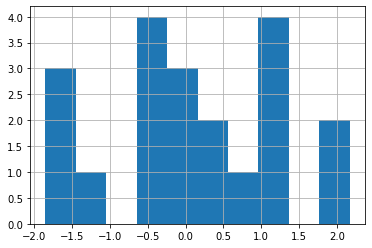

In [102]:
arr.hist() # bins=10 이 기본

전체 값의 범위를 4등분한 다음에 막대그래프를 그려보자.

In [103]:
factor = pd.cut(arr, bins=4)
factor

0       (0.158, 1.165]
1     (-1.859, -0.848]
2       (0.158, 1.165]
3       (0.158, 1.165]
4       (0.158, 1.165]
5       (1.165, 2.171]
6      (-0.848, 0.158]
7      (-0.848, 0.158]
8      (-0.848, 0.158]
9      (-0.848, 0.158]
10      (1.165, 2.171]
11      (0.158, 1.165]
12    (-1.859, -0.848]
13     (-0.848, 0.158]
14      (0.158, 1.165]
15    (-1.859, -0.848]
16      (1.165, 2.171]
17     (-0.848, 0.158]
18    (-1.859, -0.848]
19     (-0.848, 0.158]
dtype: category
Categories (4, interval[float64, right]): [(-1.859, -0.848] < (-0.848, 0.158] < (0.158, 1.165] < (1.165, 2.171]]

구간별 항목의 개수 확인

In [104]:
factor.value_counts()

(-0.848, 0.158]     7
(0.158, 1.165]      6
(-1.859, -0.848]    4
(1.165, 2.171]      3
dtype: int64

막대그래프 그리기

<AxesSubplot:>

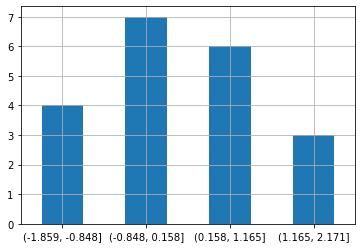

In [105]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

4등분한 구간에 라벨을 붙이면 정보를 보다 정확히 전달한다.

In [106]:
factor = pd.cut(arr, bins=4, labels=['A', 'B', 'C', 'D'])
factor

0     C
1     A
2     C
3     C
4     C
5     D
6     B
7     B
8     B
9     B
10    D
11    C
12    A
13    B
14    C
15    A
16    D
17    B
18    A
19    B
dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

<AxesSubplot:>

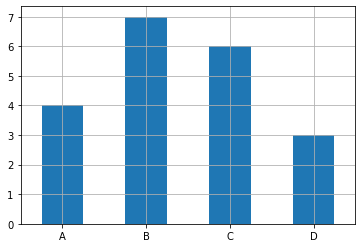

In [107]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

### 문자열 메서드 활용

참고

- [정규식](https://docs.python.org/3/library/re.html)
- [벡터와 문자열 메서드](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods)

`str` 속성은 모든 항목을 문자열로 변환한 벡터를 가리킨다.

In [108]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str

변환된 벡터에 문자열 메서드를 적용하면 새로운 시리즈가 생성된다.

In [109]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [110]:
df = pd.DataFrame(np.random.randn(3, 2), columns=[" Column A ", " Column B "], index=range(3))
df

,Column A,Column B
0,-0.982294,1.031269
1,0.491334,-0.446647
2,-0.806360,0.131268


열 라벨에 대해 문자열 메서드를 적용해보자.

- 소문자화

In [111]:
df.columns.str.lower()

Index([' column a ', ' column b '], dtype='object')

- 양끝의 공백 제거

In [112]:
df.columns.str.lower().str.strip()

Index(['column a', 'column b'], dtype='object')

- 중간에 위치한 공백을 밑줄(underscore)로 대체

In [113]:
df.columns.str.strip().str.lower().str.replace(" ", "_")

Index(['column_a', 'column_b'], dtype='object')

## 데이터 결합: merge-join-concat

- 참고: [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

### 이어붙이기: `pd.concat()` 함수

`pd.concat()` 함수는 여러 개의 데이터프레임을 하나로 합친다.

아래 코드는 실습을 위해 임의로 생성된 데이터프레임을 세 개로 쪼갠다.

In [114]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.212560,0.159991,-0.755223,0.349896
1,0.977542,-0.138585,0.103856,0.300591
2,0.968205,0.869624,0.567783,0.465282
3,-1.165373,-2.035995,-1.155413,3.345157
4,0.126727,-0.694179,0.557674,0.099147
5,0.637926,0.703111,-0.916093,-0.786014
6,1.119182,-0.983396,0.244520,-0.581410
7,0.429564,0.798402,-0.610070,1.185404
8,-0.710834,-0.781129,-0.230373,0.120195
9,-0.788470,-2.960123,-0.795581,0.284582


In [115]:
pieces = [df[:3], df[3:7], df[7:]]

아래 코드는 쪼갠 3 개의 데이터프레임을 **횡으로 합쳐**, 즉 열을 추가하는 방식으로
원래의 데이터프레임과 동일한 데이터프레임을 생성한다.

In [116]:
pd.concat(pieces)

,0,1,2,3
0,-1.212560,0.159991,-0.755223,0.349896
1,0.977542,-0.138585,0.103856,0.300591
2,0.968205,0.869624,0.567783,0.465282
3,-1.165373,-2.035995,-1.155413,3.345157
4,0.126727,-0.694179,0.557674,0.099147
5,0.637926,0.703111,-0.916093,-0.786014
6,1.119182,-0.983396,0.244520,-0.581410
7,0.429564,0.798402,-0.610070,1.185404
8,-0.710834,-0.781129,-0.230373,0.120195
9,-0.788470,-2.960123,-0.795581,0.284582


### 합병: `pd.merge()` 함수

`pd.join()` 함수 는 SQL 방식으로 특정 열을 기준으로 두 개의 데이터프레임을 합친다.
다양한 옵션을 지원하는 매우 강력한 도구이다.

- 참고: [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join)

**예제**

실습을 위해 아래 두 데이터프레임을 이용한다.

In [117]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [118]:
left

,key,lval
0,foo,1
1,foo,2


In [119]:
right

,key,rval
0,foo,4
1,foo,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목 각각에 대해 다른 열에서 해당 항목과 연관된 값들을 조합할 수 있는 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 2개의 값이,
        `rval` 열에서 2개의 값이 있기에 `foo`와 관련해서 총 4개의 경우가 생성된다.
        
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1, 2` | `4, 5` | 4 |

In [120]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


**예제**

In [121]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [122]:
left

,key,lval
0,foo,1
1,bar,2


In [123]:
right

,key,rval
0,foo,4
1,bar,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목별로 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    - `bar` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
        
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1` | `4` | 1 |        
    | `bar` | `2` | `5` | 1 |        

In [124]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


**예제**

경우의 수는 지정된 열의 항목이 사용된 횟수를 기준으로 한다. 

In [125]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [126]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [127]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [128]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


| `key` | (`left.A`, `left.B`) | (`right.C`, `right.D`) | 경우의 수 |
| :---: | :---: | :---: | :---: |
| `K0` | (`A0`, `B0`) | (`C0`, `D0`) | 1 |
| `K1` | (`A1`, `B1`) | (`C1`, `D1`) | 1 |
| `K2` | (`A2`, `B2`) | (`C2`, `D2`) | 1 |
| `K3` | (`A3`, `B3`) | (`C3`, `D3`) | 1 |

In [129]:
result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**다양한 키워드 인자**

In [130]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [131]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


- `how='inner'`: 지정된 키의 교집합 대상

In [132]:
result = pd.merge(left, right, on=["key1", "key2"]) # how='inner' 가 기본값
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [133]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


- `how='outer'`: 지정된 키의 합집합 대상

In [134]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


- `how='left'`: 왼쪽 데이터프레임의 키에 포함된 항목만 대상

In [135]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [136]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- `how='right'`: 오른쪽 데이터프레임의 키에 포함된 항목만 대상

In [137]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [138]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


- `how='cross'`: 모든 경우의 수 조합

In [139]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


## 그룹화: `pd.groupby()` 함수

- 참고: [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)

`pd.groupby()` 함수는 다음 3 기능을 제공한다.

- **분류**: 데이터를 조건에 따라 여러 그룹으로 분류
- **함수 적용**: 그룹별로 함수 적용
- **조합**: 그룹별 함수 결과를 조합하여 새로운 데이터프레임/시리즈 생성

In [140]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.522537,0.775202
1,bar,one,0.083554,0.556003
2,foo,two,2.720796,-0.540980
3,bar,three,0.611008,1.524417
4,foo,two,-0.835944,1.208385
5,bar,two,-0.003696,0.051277
6,foo,one,0.393095,-0.426631
7,bar,three,0.684495,0.807940


- `A` 열에 사용된 항목 기준으로 그룹으로 분류한 후 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성

| `A`(사용횟수) | 경우의 수 |
| :---: | :---: |
| `bar`(4) | 1 |
| `foo`(4) | 1 |

In [141]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,1.375361,2.939638
foo,2.800484,1.015976


- `A`열의 항목과 `B` 열의 항목의 조합을 기준으로 그룹으로 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성

| `A`(사용횟수) | `B`(사용횟수) | 경우의 수 |
| :---: | :---: | :---: |
| `bar`(4) | `one`(2), `two`(2) | 2 |
| `foo`(4) | `one`(1), `three`(2), `two`(1) | 3 |

In [142]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.083554  0.556003
    three  1.295503  2.332357
    two   -0.003696  0.051277
foo one    0.915632  0.348570
    two    1.884852  0.667405

**그룹 확인**

- `for` 반복문 활용 

In [143]:
for name, group in df.groupby(["A", "B"]):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one  0.083554  0.556003
('bar', 'three')
     A      B         C         D
3  bar  three  0.611008  1.524417
7  bar  three  0.684495  0.807940
('bar', 'two')
     A    B         C         D
5  bar  two -0.003696  0.051277
('foo', 'one')
     A    B         C         D
0  foo  one  0.522537  0.775202
6  foo  one  0.393095 -0.426631
('foo', 'two')
     A    B         C         D
2  foo  two  2.720796 -0.540980
4  foo  two -0.835944  1.208385


- `get_group()` 메서드

In [144]:
df.groupby(["A", "B"]).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,0.083554,0.556003


In [145]:
df.groupby(["A", "B"]).get_group(('bar', 'three'))

,A,B,C,D
3,bar,three,0.611008,1.524417
7,bar,three,0.684495,0.807940


- `groups` 속성

In [146]:
df.groupby(["A", "B"]).groups

{('bar', 'one'): [1], ('bar', 'three'): [3, 7], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'two'): [2, 4]}

- `value_counts` 속성

In [147]:
df.groupby(["A", "B"]).value_counts()

A    B      C          D        
bar  one     0.083554   0.556003    1
     three   0.611008   1.524417    1
             0.684495   0.807940    1
     two    -0.003696   0.051277    1
foo  one     0.393095  -0.426631    1
             0.522537   0.775202    1
     two    -0.835944   1.208385    1
             2.720796  -0.540980    1
dtype: int64

- `nunique` 속성

In [148]:
df.groupby(["A", "B"]).nunique()

C  D
A   B          
bar one    1  1
    three  2  2
    two    1  1
foo one    2  2
    two    2  2

- `sort=True` 키워드 인자

In [149]:
df.groupby(["A", "B"], sort=True).sum()

C         D
A   B                        
bar one    0.083554  0.556003
    three  1.295503  2.332357
    two   -0.003696  0.051277
foo one    0.915632  0.348570
    two    1.884852  0.667405

In [150]:
df.groupby(["A", "B"], sort=False).sum()

C         D
A   B                        
foo one    0.915632  0.348570
bar one    0.083554  0.556003
foo two    1.884852  0.667405
bar three  1.295503  2.332357
    two   -0.003696  0.051277

In [151]:
df.groupby(["A", "B"], sort=False).nunique()

C  D
A   B          
foo one    2  2
bar one    1  1
foo two    2  2
bar three  2  2
    two    1  1

**그룹 연산**

In [152]:
df.groupby('A')[["C", "D"]].max()

,C,D
A,,
bar,0.684495,1.524417
foo,2.720796,1.208385


In [153]:
df.groupby(["A", "B"]).max()

C         D
A   B                        
bar one    0.083554  0.556003
    three  0.684495  1.524417
    two   -0.003696  0.051277
foo one    0.522537  0.775202
    two    2.720796  1.208385

In [154]:
df.groupby('A')[["C", "D"]].mean()

,C,D
A,,
bar,0.343840,0.734909
foo,0.700121,0.253994


In [155]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one    0.083554  0.556003
    three  0.647751  1.166179
    two   -0.003696  0.051277
foo one    0.457816  0.174285
    two    0.942426  0.333703

In [156]:
df.groupby('A')[["C", "D"]].size()

A
bar    4
foo    4
dtype: int64

In [157]:
df.groupby(["A", "B"]).size()

A    B    
bar  one      1
     three    2
     two      1
foo  one      2
     two      2
dtype: int64

In [158]:
df.groupby('A')[["C", "D"]].describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   4.0  0.343840  0.354003 -0.003696  0.061742  0.347281  0.629380   
foo   4.0  0.700121  1.479687 -0.835944  0.085835  0.457816  1.072102   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  0.684495   4.0  0.734909  0.613193  0.051277  0.429821  0.681972   
foo  2.720796   4.0  0.253994  0.871350 -0.540980 -0.455218  0.174285   

                         
          75%       max  
A                        
bar  0.987059  1.524417  
foo  0.883498  1.208385

In [159]:
df.groupby(["A", "B"]).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0  0.083554       NaN  0.083554  0.083554  0.083554  0.083554   
    three   2.0  0.647751  0.051963  0.611008  0.629380  0.647751  0.666123   
    two     1.0 -0.003696       NaN -0.003696 -0.003696 -0.003696 -0.003696   
foo one     2.0  0.457816  0.091530  0.393095  0.425455  0.457816  0.490177   
    two     2.0  0.942426  2.514995 -0.835944  0.053241  0.942426  1.831611   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one    0.083554   1.0  0.556003       NaN  0.556003  0.556003  0.556003   
    three  0.684495   2.0  1.166179  0.506626  0.807940  0.987059  1.166179   
    two   -0.003696   1.0  0.051277       NaN  0.051277  0.051277  0.051277   
foo one    0.522537   2.0  0.174285  0.849824 -0.426631 -0.126173  0.174285   
    two    2.720796   2.0  0.333703  1.236988 -0.540980 -0.103639  0.333703   

                               
                75%       max  
A   B                          
bar one    0.556003  0.556003  
    three  1.345298  1.524417  
    two    0.051277  0.051277  
foo one    0.474743  0.775202  
    two    0.771044  1.208385

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [160]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.057280 -1.040172
      two     0.934148 -0.120035
baz   one     2.207016 -3.399931
      two     1.233529 -0.587881

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [161]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.057280
               B   -1.040172
       two     A    0.934148
               B   -0.120035
baz    one     A    2.207016
               B   -3.399931
       two     A    1.233529
               B   -0.587881
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [162]:
stacked.unstack()

A         B
first second                    
bar   one     0.057280 -1.040172
      two     0.934148 -0.120035
baz   one     2.207016 -3.399931
      two     1.233529 -0.587881

In [163]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.057280  0.934148
      B -1.040172 -0.120035
baz   A  2.207016  1.233529
      B -3.399931 -0.587881

In [164]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.057280  2.207016
       B -1.040172 -3.399931
two    A  0.934148  1.233529
       B -0.120035 -0.587881

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [165]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.224799,-1.059770
1,one,B,foo,2.215901,-0.446122
2,two,C,foo,-0.154258,-1.162449
3,three,A,bar,0.287607,-0.621992
4,one,B,bar,0.579361,0.609331
5,one,C,bar,0.933250,0.615220
6,two,A,foo,1.669618,0.504298
7,three,B,foo,1.717239,-0.675703
8,one,C,foo,-0.253651,1.313516
9,one,A,bar,-1.163049,0.903375


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [166]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -1.163049 -0.224799
      B  0.579361  2.215901
      C  0.933250 -0.253651
three A  0.287607       NaN
      B       NaN  1.717239
      C -1.409031       NaN
two   A       NaN  1.669618
      B  0.534451       NaN
      C       NaN -0.154258

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [167]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    25367
Freq: 5T, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [168]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06   -0.412695
2012-03-07   -0.674482
2012-03-08    0.434687
2012-03-09    1.173599
2012-03-10   -0.483602
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00   -0.412695
2012-03-07 00:00:00+00:00   -0.674482
2012-03-08 00:00:00+00:00    0.434687
2012-03-09 00:00:00+00:00    1.173599
2012-03-10 00:00:00+00:00   -0.483602
Freq: D, dtype: float64

Converting between time span representations:

In [169]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

2012-01    0.869613
2012-02   -0.398346
2012-03    0.449468
2012-04    2.978047
2012-05    0.960284
Freq: M, dtype: float64

In [170]:
ps.to_timestamp()

2012-01-01    0.869613
2012-02-01   -0.398346
2012-03-01    0.449468
2012-04-01    2.978047
2012-05-01    0.960284
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [171]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    0.970523
1990-06-01 09:00   -1.682364
1990-09-01 09:00    1.329373
1990-12-01 09:00   -0.654708
1991-03-01 09:00    0.465971
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [172]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [173]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [174]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [175]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [176]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [177]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

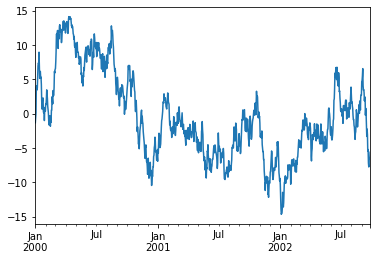

In [178]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

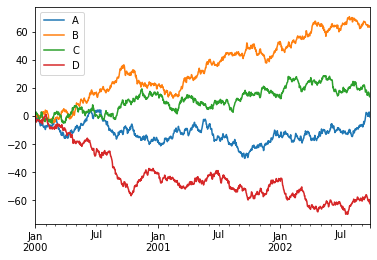

In [179]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [180]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [181]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.778854,0.300740,1.143376,0.413498
1,2000-01-02,-0.895585,0.072051,1.609118,-1.156647
2,2000-01-03,-1.629582,0.533519,2.775681,-2.783322
3,2000-01-04,-0.815332,1.200758,2.695190,-4.333854
4,2000-01-05,-1.058141,1.233130,1.407487,-3.895468
...,...,...,...,...,...
995,2002-09-22,1.908226,63.911550,16.256612,-60.097574
996,2002-09-23,2.819064,63.598476,16.000503,-59.344978
997,2002-09-24,1.071752,63.641519,13.749356,-61.702331
998,2002-09-25,-0.745637,63.131043,14.263712,-61.960437


### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store using [`DataFrame.to_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html#pandas.DataFrame.to_hdf):

In [182]:
df.to_hdf("foo.h5", "df")

Reading from a HDF5 Store using [`read_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html#pandas.read_hdf):

In [183]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-0.778854,0.300740,1.143376,0.413498
2000-01-02,-0.895585,0.072051,1.609118,-1.156647
2000-01-03,-1.629582,0.533519,2.775681,-2.783322
2000-01-04,-0.815332,1.200758,2.695190,-4.333854
2000-01-05,-1.058141,1.233130,1.407487,-3.895468
...,...,...,...,...
2002-09-22,1.908226,63.911550,16.256612,-60.097574
2002-09-23,2.819064,63.598476,16.000503,-59.344978
2002-09-24,1.071752,63.641519,13.749356,-61.702331
2002-09-25,-0.745637,63.131043,14.263712,-61.960437


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [184]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [185]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.778854,0.300740,1.143376,0.413498
1,2000-01-02,-0.895585,0.072051,1.609118,-1.156647
2,2000-01-03,-1.629582,0.533519,2.775681,-2.783322
3,2000-01-04,-0.815332,1.200758,2.695190,-4.333854
4,2000-01-05,-1.058141,1.233130,1.407487,-3.895468
...,...,...,...,...,...
995,2002-09-22,1.908226,63.911550,16.256612,-60.097574
996,2002-09-23,2.819064,63.598476,16.000503,-59.344978
997,2002-09-24,1.071752,63.641519,13.749356,-61.702331
998,2002-09-25,-0.745637,63.131043,14.263712,-61.960437


## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

In [186]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.